<a href="https://colab.research.google.com/github/KenkiCZ/google_notebooks/blob/main/C104_Again.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**.

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive
from sklearn.linear_model import LinearRegression
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Programming/C104_Seaborn-Scikit/cost_revenue_dirty.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Notebook Presentation

In [42]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [43]:
print(f"Number of rows: {df.shape[0]} \nNumber of columns: {df.shape[1]}\n")
print(f"Is there any null value: {df.isna().sum().any()}\n")
print(f"Is there any duplicated value: {df.duplicated().sum().any()}\n")
print(f"{df.dtypes}")

Number of rows: 5391 
Number of columns: 6

Is there any null value: False

Is there any duplicated value: False

Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`.
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [44]:
cols = ["USD_Production_Budget", "USD_Worldwide_Gross", "USD_Domestic_Gross"]
df[cols] = df[cols].replace({',': '', '\$': ''}, regex=True).astype(float)
# Regex is used to remove the dollar sign and commas from the data

**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type.

In [45]:
df["Release_Date"] = pd.to_datetime(df["Release_Date"])
df.head(10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,"110,000.00","11,000,000.00","10,000,000.00"
1,5140,1916-05-09,Intolerance,"385,907.00",0.00,0.00
2,5230,1916-12-24,"20,000 Leagues Under the Sea","200,000.00","8,000,000.00","8,000,000.00"
3,5299,1920-09-17,Over the Hill to the Poorhouse,"100,000.00","3,000,000.00","3,000,000.00"
4,5222,1925-01-01,The Big Parade,"245,000.00","22,000,000.00","11,000,000.00"
5,4250,1925-12-30,Ben-Hur,"3,900,000.00","9,000,000.00","9,000,000.00"
6,4630,1927-12-08,Wings,"2,000,000.00",0.00,0.00
7,5141,1929-01-02,The Broadway Melody,"379,000.00","4,358,000.00","2,800,000.00"
8,4240,1930-01-01,Hell's Angels,"4,000,000.00",0.00,0.00
9,5043,1931-12-31,Mata Hari,"558,000.00","900,000.00","900,000.00"


### Descriptive Statistics

**Challenge**:

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [46]:
print(f"The average productio budget is: {df['USD_Production_Budget'].mean()}")
print(f"{df[['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']].describe()}")

The average productio budget is: 31113737.57837136
       USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross
count               5,391.00             5,391.00            5,391.00
mean           31,113,737.58        88,855,421.96       41,235,519.44
std            40,523,796.88       168,457,757.00       66,029,346.27
min                 1,100.00                 0.00                0.00
25%             5,000,000.00         3,865,206.00        1,330,901.50
50%            17,000,000.00        27,450,453.00       17,192,205.00
75%            40,000,000.00        96,454,455.00       52,343,687.00
max           425,000,000.00     2,783,918,982.00      936,662,225.00


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [47]:
grossed_0 = df[df["USD_Domestic_Gross"] == 0]
print(f'{grossed_0.shape[0]} movies grossed $0 domestically')
print(f"{grossed_0[['Movie_Title', 'USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']].sort_values(by='USD_Production_Budget', ascending=False).head()}")

512 movies grossed $0 domestically
                             Movie_Title  USD_Production_Budget  \
5388                         Singularity         175,000,000.00   
5387                             Aquaman         160,000,000.00   
5384                   A Wrinkle in Time         103,000,000.00   
5385                      Amusement Park         100,000,000.00   
5090  Don Gato, el inicio de la pandilla          80,000,000.00   

      USD_Worldwide_Gross  USD_Domestic_Gross  
5388                 0.00                0.00  
5387                 0.00                0.00  
5384                 0.00                0.00  
5385                 0.00                0.00  
5090         4,547,660.00                0.00  


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [53]:
grossed_0_worldwide = df[df["USD_Worldwide_Gross"] == 0]
print(grossed_0_worldwide["Movie_Title"].count())
grossed_0_worldwide.head(15)

357


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,"385,907.00",0.00,0.00
6,4630,1927-12-08,Wings,"2,000,000.00",0.00,0.00
8,4240,1930-01-01,Hell's Angels,"4,000,000.00",0.00,0.00
17,4814,1936-10-20,"Charge of the Light Brigade, The","1,200,000.00",0.00,0.00
27,4789,1941-10-28,How Green Was My Valley,"1,250,000.00",0.00,0.00
50,4419,1951-07-28,Alice in Wonderland,"3,000,000.00",0.00,0.00
66,4705,1955-12-31,The King’s Thief,"1,577,000.00",0.00,0.00
75,4455,1956-12-01,Diane,"2,660,000.00",0.00,0.00
78,5152,1957-04-13,12 Angry Men,"340,000.00",0.00,0.00
140,3559,1968-10-10,Barbarella,"9,000,000.00",0.00,0.00


### Filtering on Multiple Conditions

In [57]:
df[(df["USD_Domestic_Gross"] == 0) & (df["USD_Worldwide_Gross"] != 0)]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,"3,380,000.00","3,220.00",0.00
1579,5087,2001-02-11,Everything Put Together,"500,000.00","7,890.00",0.00
1744,3695,2001-12-31,The Hole,"7,500,000.00","10,834,406.00",0.00
2155,4236,2003-12-31,Nothing,"4,000,000.00","63,180.00",0.00
2203,2513,2004-03-31,The Touch,"20,000,000.00","5,918,742.00",0.00
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,"36,000,000.00","1,480,089.00",0.00
5348,2225,2017-05-05,Chāi dàn zhuānjiā,"23,000,000.00","58,807,172.00",0.00
5360,4832,2017-07-03,Departure,"1,100,000.00","27,561.00",0.00
5372,1856,2017-08-25,Ballerina,"30,000,000.00","48,048,527.00",0.00


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States.

Hint: This time you'll have to use the `and` keyword.

In [58]:
df.query("USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0") # Produces same results as above line

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,"3,380,000.00","3,220.00",0.00
1579,5087,2001-02-11,Everything Put Together,"500,000.00","7,890.00",0.00
1744,3695,2001-12-31,The Hole,"7,500,000.00","10,834,406.00",0.00
2155,4236,2003-12-31,Nothing,"4,000,000.00","63,180.00",0.00
2203,2513,2004-03-31,The Touch,"20,000,000.00","5,918,742.00",0.00
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,"36,000,000.00","1,480,089.00",0.00
5348,2225,2017-05-05,Chāi dàn zhuānjiā,"23,000,000.00","58,807,172.00",0.00
5360,4832,2017-07-03,Departure,"1,100,000.00","27,561.00",0.00
5372,1856,2017-08-25,Ballerina,"30,000,000.00","48,048,527.00",0.00


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office?
* Create another DataFrame called data_clean that does not include these films.

In [70]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')
print(f'{df[df["Release_Date"] > scrape_date]["Movie_Title"].count()}')
df_clean = df[df["Release_Date"] < scrape_date]

7


In [71]:
df_clean.shape

(5384, 6)

### Films that Lost Money

**Challenge**:
What is the percentage of films where the production costs exceeded the worldwide gross revenue?

In [77]:
percentage = df_clean[df_clean["USD_Production_Budget"] > df_clean["USD_Worldwide_Gross"]].shape[0] / df_clean.shape[0] * 100
print(f'{percentage:.2f} %')

37.28 %


# Seaborn for Data Viz: Bubble Charts

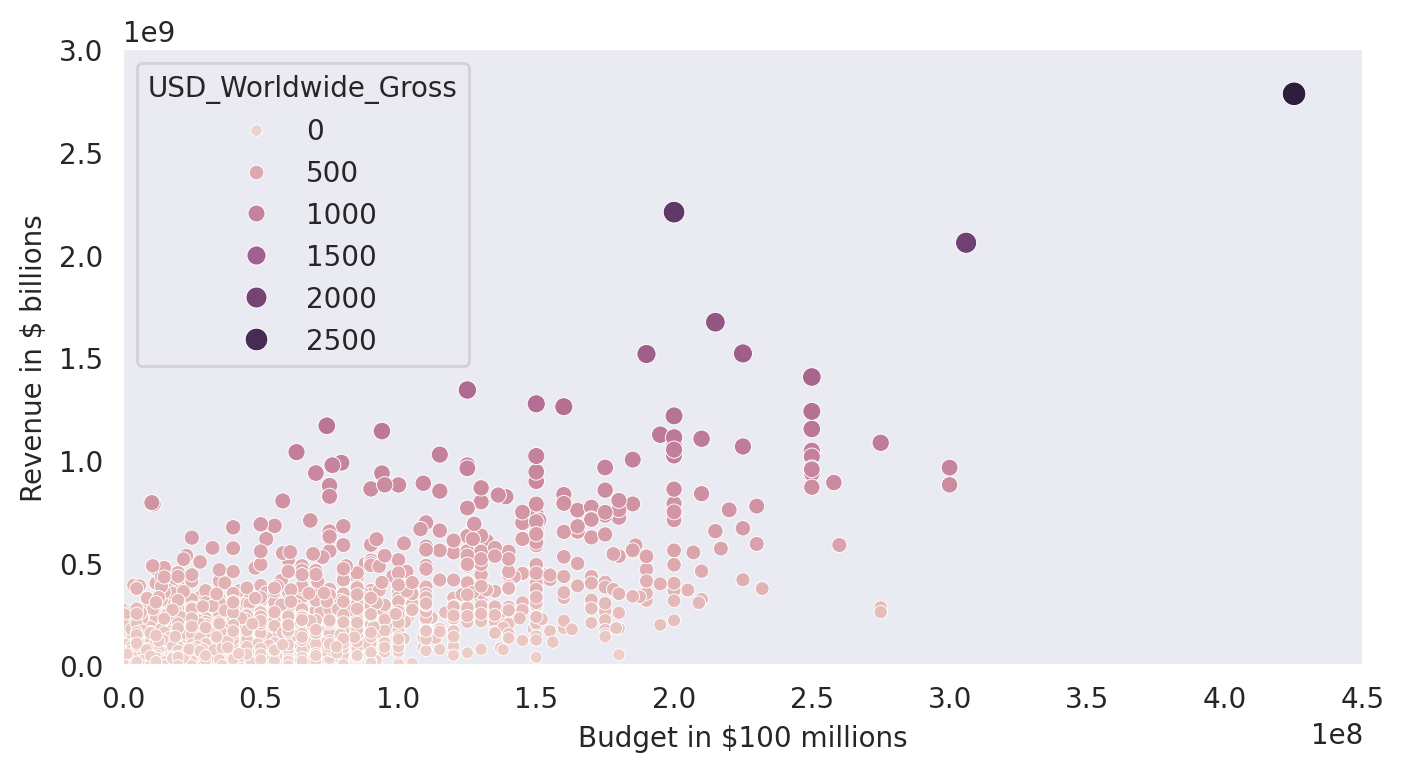

In [92]:
plt.figure(figsize=(8, 4), dpi=200)


with sns.axes_style("dark"):
  axis = sns.scatterplot(data=df_clean,
                        x="USD_Production_Budget",
                        y="USD_Worldwide_Gross",
                        hue = df_clean["USD_Worldwide_Gross"]/1000000,
                        size = df_clean["USD_Worldwide_Gross"]/1000000)
  axis.set(ylim = (0, 3000000000),
          xlim = (0, 450000000),
          ylabel = "Revenue in $ billions",
          xlabel = "Budget in $100 millions")
  plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



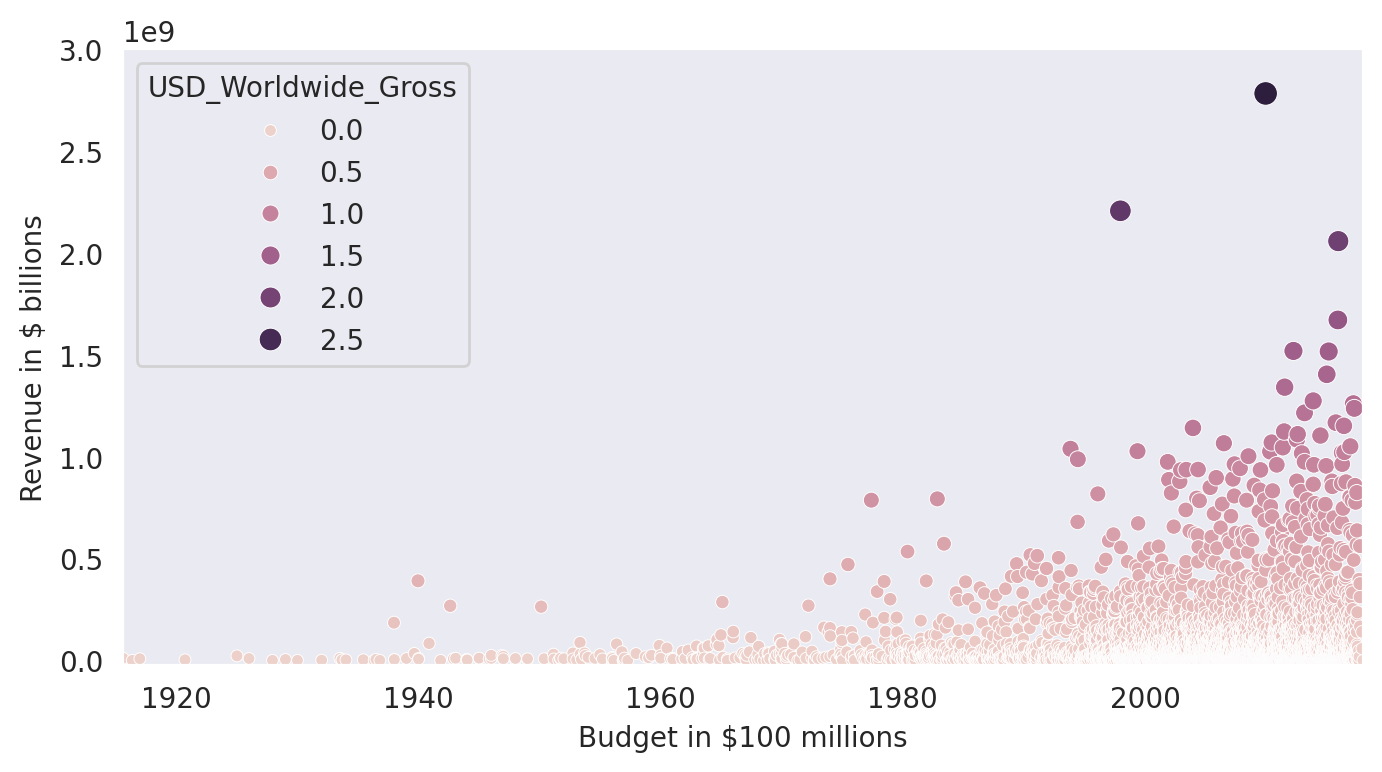

In [114]:
plt.figure(figsize=(8, 4), dpi=200)


with sns.axes_style("dark"):
  axis = sns.scatterplot(data=df_clean,
                        x="Release_Date",
                        y="USD_Worldwide_Gross",
                        hue = df_clean["USD_Worldwide_Gross"]/1000000000,
                        size = df_clean["USD_Worldwide_Gross"]/1000000000)
  axis.set(ylim = (-25000000, 3000000000),
           xlim = (df_clean["Release_Date"].min(), df_clean["Release_Date"].max()),
          ylabel = "Revenue in $ billions",
          xlabel = "Budget in $100 millions")
  plt.show()

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release.

<img src=https://i.imgur.com/0VEfagw.png width=650>

Here's how:
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column.
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [119]:
df_clean.loc[:, "Decade"] = df_clean["Release_Date"].dt.year // 10 * 10
df_clean

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,"110,000.00","11,000,000.00","10,000,000.00",1910
1,5140,1916-05-09,Intolerance,"385,907.00",0.00,0.00,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea","200,000.00","8,000,000.00","8,000,000.00",1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,"100,000.00","3,000,000.00","3,000,000.00",1920
4,5222,1925-01-01,The Big Parade,"245,000.00","22,000,000.00","11,000,000.00",1920
...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,"40,000,000.00","166,893,990.00","92,029,184.00",2010
5380,70,2017-10-03,Kong: Skull Island,"185,000,000.00","561,137,727.00","168,052,812.00",2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,"175,000,000.00","140,012,608.00","39,175,066.00",2010
5382,1254,2017-12-05,Snatched,"42,000,000.00","57,850,343.00","45,850,343.00",2010


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [125]:
from types import new_class
border_year = 1970
old_films = df_clean[df_clean["Decade"] < border_year]
new_films = df_clean[df_clean["Decade"] >= border_year]
old_films.shape

(153, 7)

# Seaborn Regression Plots

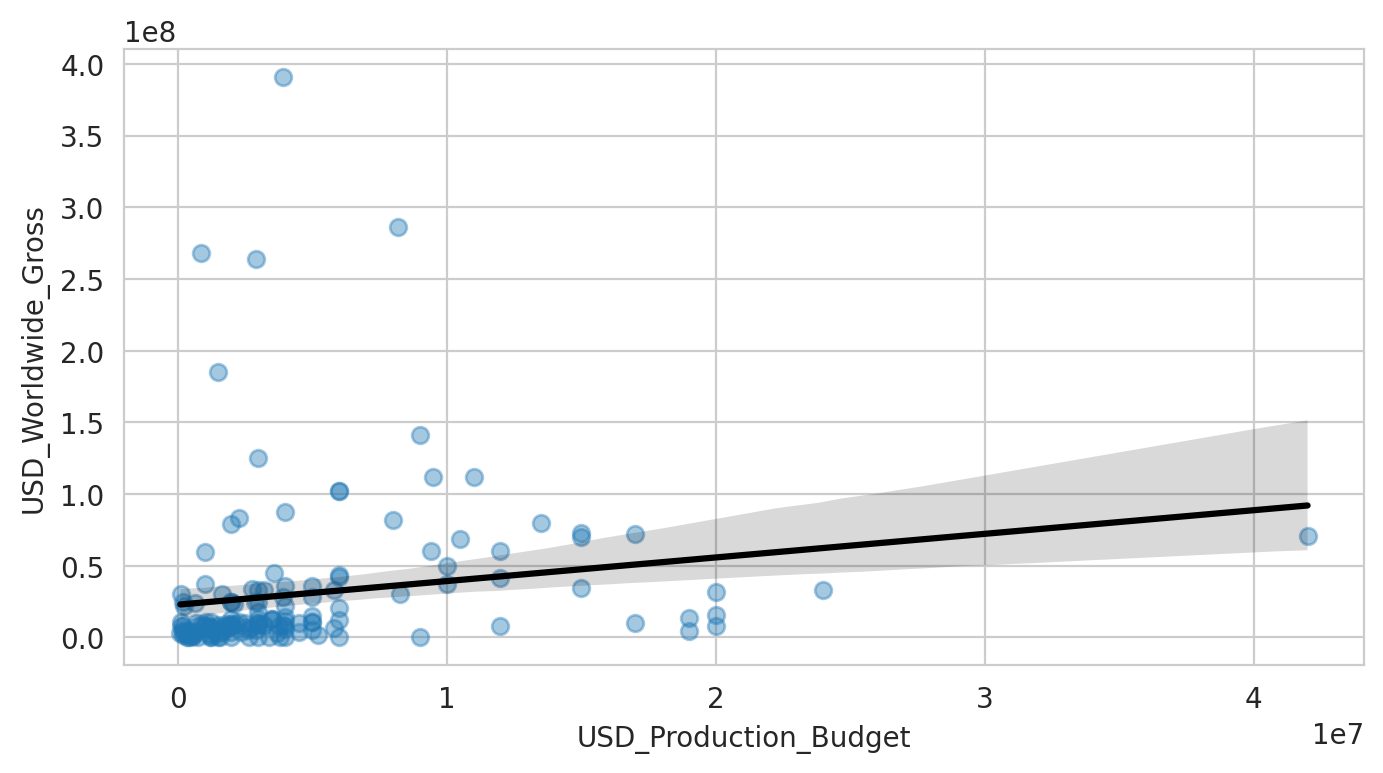

In [124]:

plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films,
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})


**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`.
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

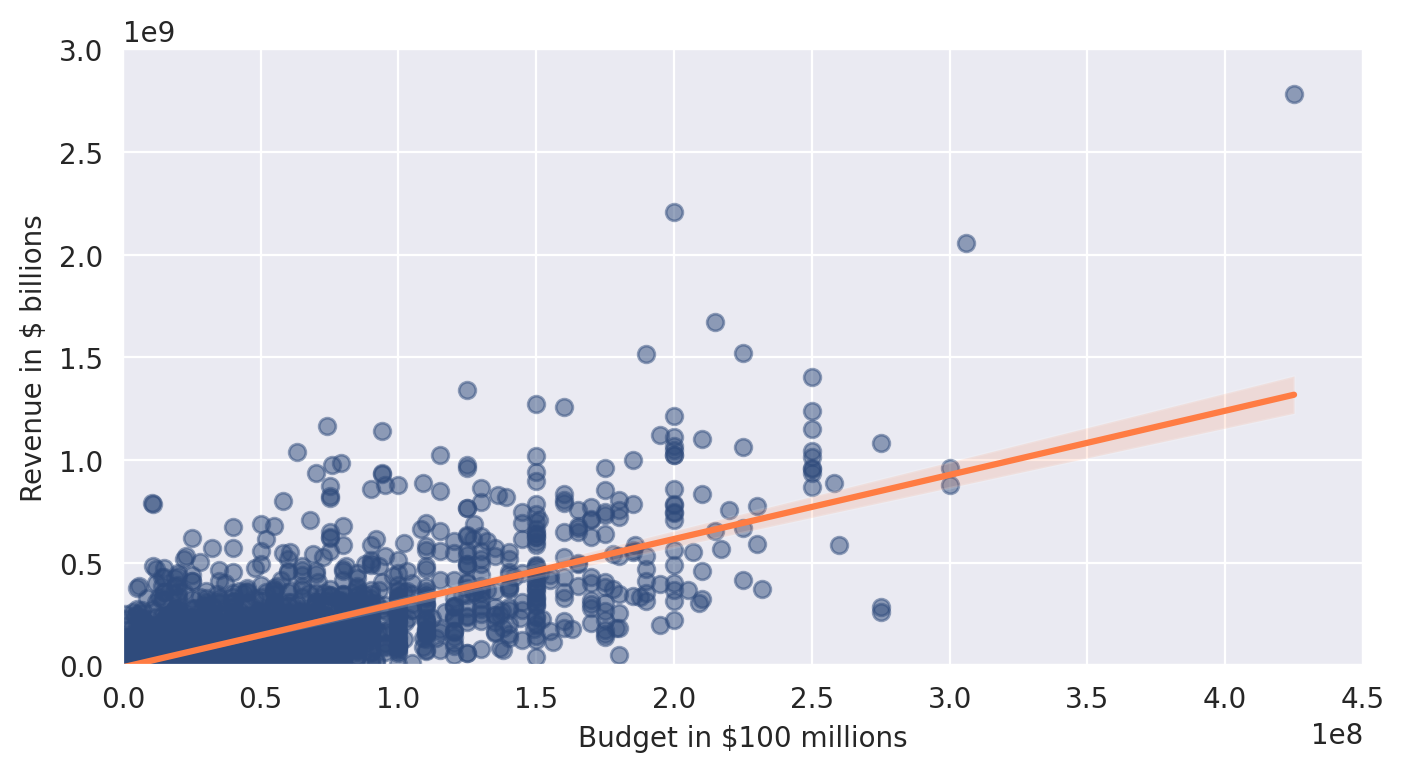

In [128]:
plt.figure(figsize = (8,4), dpi=200)
with sns.axes_style("darkgrid"):
  axis = sns.regplot(data = new_films,
              x = "USD_Production_Budget",
              y = "USD_Worldwide_Gross",
              scatter_kws = {'alpha': 0.5, "color":"#2f4b7c"},
              line_kws = {'color': '#ff7c43'})

  axis.set(ylim = (0, 3000000000),
           xlim = (0, 450000000),
           ylabel = "Revenue in $ billions",
           xlabel = "Budget in $100 millions")
  plt.show()

  # Yes, our line acts much better than the previous
  # Around $500 mil

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [140]:
regression = LinearRegression()

# Explonatory Variables or Features
X = pd.DataFrame(new_films, columns=["USD_Production_Budget"])

# Responsive variable
y = pd.DataFrame(new_films, columns=["USD_Worldwide_Gross"])

regression.fit(X, y)
print(f"Slope {regression.coef_[0][0]}")
print(f"Interception with Y-axis {regression.intercept_[0]}")
print(f"R^2 {(regression.score(X, y) * 100):.2f}%")

Slope 3.1225959173210933
Interception with Y-axis -8650768.006610274
R^2 55.77%


**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [141]:
regression = LinearRegression()

# Explonatory Variables or Features
X = pd.DataFrame(old_films, columns=["USD_Production_Budget"])

# Responsive variable
y = pd.DataFrame(old_films, columns=["USD_Worldwide_Gross"])

regression.fit(X, y)
print(f"Slope {regression.coef_[0][0]}")
print(f"Interception with Y-axis {regression.intercept_[0]}")
print(f"R^2 {(regression.score(X, y) * 100):.2f}%")

Slope 1.6477131440107315
Interception with Y-axis 22821538.635080386
R^2 2.94%


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million?

In [146]:
regression.intercept_[0]/100000000 + regression.coef_[0][0] * 350

576.9278157901068